In [72]:
import networkx as nx
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

In [4]:
list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [14]:
G.add_edge('Alice','Bob')
G.add_edge('Alice','Chuck')
G.add_edge('Bob','Alice')
G.add_edge('Bob','Chuck')

In [15]:
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

In [16]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

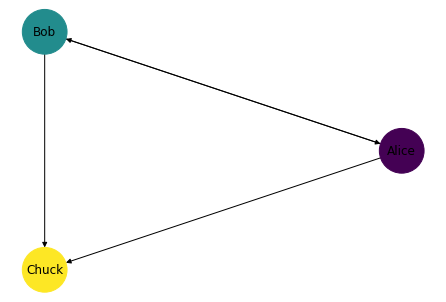

In [18]:
nx.draw_circular(G,
                node_color = colors[0],
                node_size = 2000,
                with_labels = True)

In [27]:
positions = dict(Albany = (-74, 43),
                Boston = (-71,42),
                NYC = (-74, 41),
                Philly = (-75,40))

In [20]:
G = nx.Graph()

In [21]:
G.add_nodes_from(positions)

In [22]:
drive_times = {('Albany','Boston'):3,
               ('Albany','NYC'):4,
              ('Boston','NYC'):4,
              ('NYC','Philly'):2}

In [23]:
G.add_edges_from(drive_times)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


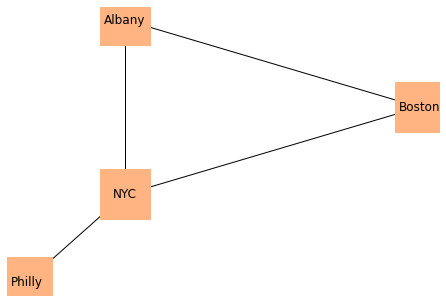

In [31]:
nx.draw(G,positions,
        node_color = colors[1],
       node_shape='s',
       node_size=2500,
       with_labels=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

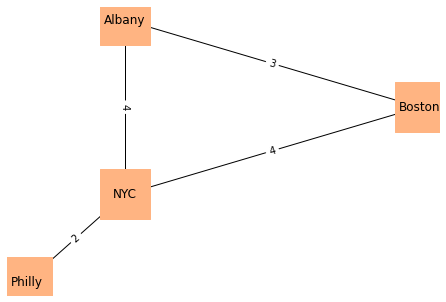

In [34]:
nx.draw(G,positions,
        node_color = colors[1],
       node_shape='s',
       node_size=2500,
       with_labels=True)
nx.draw_networkx_edge_labels(G,positions,
                             edge_labels=drive_times)

In [44]:
for i,j in enumerate(range(1,11)):
    print(i,j)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10


In [35]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j,v in enumerate(nodes):
            if i>j:
                yield u,v

In [45]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


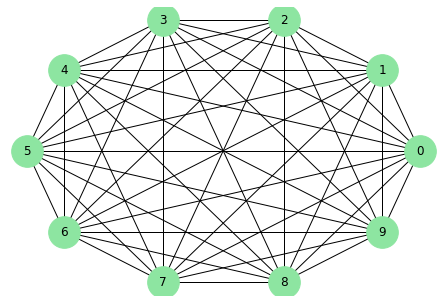

In [46]:
complete = make_complete_graph(10)
nx.draw_circular(complete,
                node_color = colors[2],
                node_size = 1000,
                with_labels = True)

In [48]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [49]:
def reachable_nodes(G,start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [50]:
reachable_nodes(complete,0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [54]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G,start)
    return len(reachable) == len(G)

In [55]:
is_connected(complete)

True

In [56]:
def random_pairs(nodes,p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [58]:
def flip(p):
    return np.random.random() < p

In [59]:
def make_random_graph(n,p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes,p))
    return G

In [61]:
random_graph = make_random_graph(10,0.3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


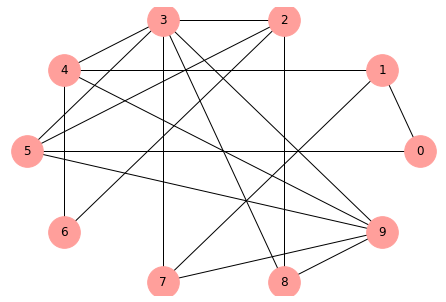

In [64]:
nx.draw_circular(random_graph,
                node_color = colors[3],
                node_size = 1000,
                with_labels = True)

## 2.7 Probability of connectivity

In [69]:
def prob_connected(n,p,iters=100):
    tf = [is_connected(make_random_graph(n,p)) 
          for i in range(iters)]
    return np.mean(tf)

In [70]:
prob_connected(10,0.23,iters=10000)

0.3472

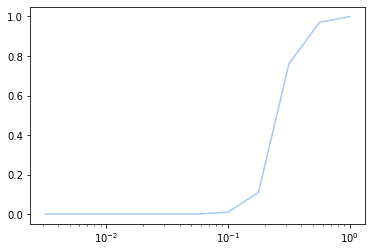

In [78]:
n = 10
ps = np.logspace(-2.5, 0, 11)
ys = [prob_connected(n,p) for p in ps]
plt.plot(ps,ys)
plt.xscale('log')

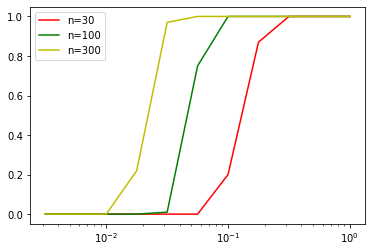

In [84]:
n = 30
ps = np.logspace(-2.5, 0, 11)
ys_30 = [prob_connected(30,p) for p in ps]
ys_100 = [prob_connected(100,p) for p in ps]
ys_300 = [prob_connected(300,p) for p in ps]

plt.plot(ps,ys_30,'r',label='n=30')
plt.plot(ps,ys_100,'g',label='n=100')
plt.plot(ps,ys_300,'y',label='n=300')
plt.xscale('log')
plt.legend()

In [77]:
prob_connected(10, 0.23, iters = 10000)

0.3377